Theoretical Time Delay: 2.524855e-04 s
Estimated Time Delay: -2.494331e-04 s
Phase Delay: -1.567234 radians


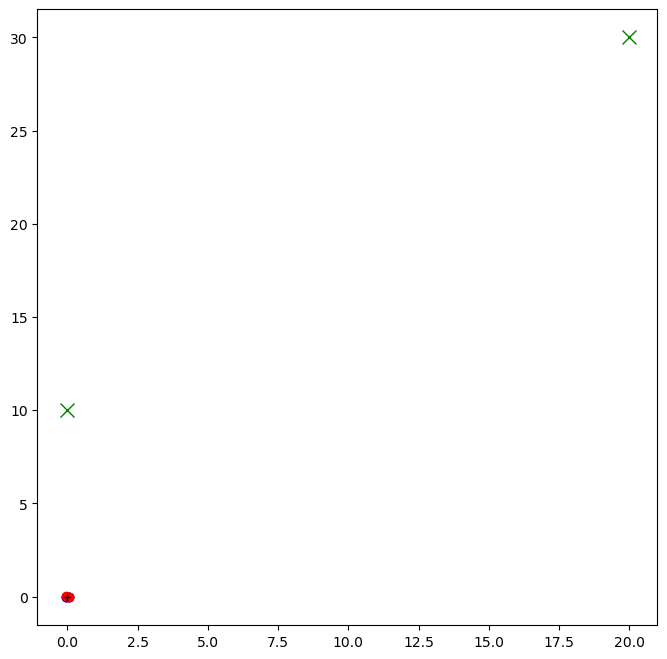

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft
from scipy.signal import correlate
from IPython.display import Audio

In [25]:
# Load audio file and display it
folder_path = r'Bird_sound'
filename = "call1 (2).wav"
file_path = os.path.join(folder_path, filename)

SR, y = wavfile.read(file_path)
display(Audio(y, rate=SR))

spectrum = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(y), 1/fs)
magnitude = np.abs(spectrum)
peak_index = np.argmax(magnitude)
freq = abs(frequencies[peak_index])

print(freq)

2694.3001822969413


-0.5880026035475675


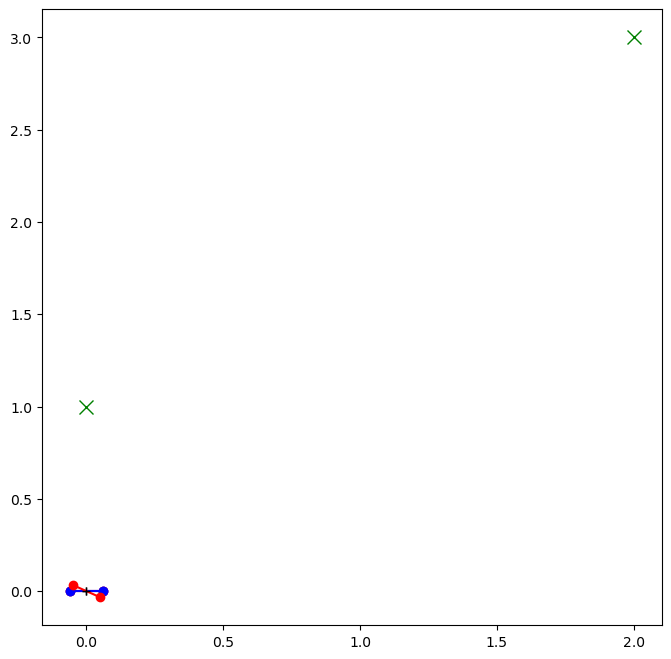

In [81]:
# Microphone positions
mic1_initial = np.array([-0.06, 0])   # Mic 1 at [-1, 0]
mic2_initial = np.array([0.06, 0])    # Mic 2 at [1, 0]
mic_distance = np.linalg.norm(mic2_initial - mic1_initial)  # Distance between microphones
midpoint = (mic1_initial + mic2_initial) / 2  # Midpoint between mic 1 and mic 2

# Sound source positions
sound_sources = [np.array([0, 1]), np.array([2, 3])]  # Add multiple sound sources

# Function to rotate microphones
def mic_rotation(angle_to_rotate, sound_source, midpoint):
    mic1_rotated = midpoint + (mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    mic2_rotated = midpoint + (-mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])

    return mic1_rotated, mic2_rotated, angle_to_rotate

# Calculate and plot microphone rotations for each sound source
plt.figure(figsize=(8, 8))
for i, sound_source in enumerate(sound_sources):
    angle_diff = -np.arctan2(sound_source[0] - midpoint[0], sound_source[1] - midpoint[1])
    mic1_rotated, mic2_rotated, angle_to_rotate = mic_rotation(angle_diff, sound_source, midpoint)

    # Plot initial and rotated microphone positions
    plt.plot([mic1_initial[0], mic2_initial[0]], [mic1_initial[1], mic2_initial[1]], 'bo-', label=f"Initial Mic Positions (Source {i + 1})")
    plt.plot([mic1_rotated[0], mic2_rotated[0]], [mic1_rotated[1], mic2_rotated[1]], 'ro-', label=f"Aligned Mic Positions (Source {i + 1})")
    plt.plot(sound_source[0], sound_source[1], 'gx', label=f"Sound Source {i + 1}", markersize=10)
    plt.plot(midpoint[0], midpoint[1], 'k+', label=f"Midpoint (Source {i + 1})")

print(angle_to_rotate)

In [83]:
#Parameters
c = 343 

fs = SR
f = freq
duration = len(y) / fs

d = mic_distance
angle_deg = np.rad2deg(angle_to_rotate)

# Delay between microphones
angle_rad = np.deg2rad(angle_deg)
delta_t_theoretical = (d * np.cos(angle_rad)) / c

# "Audio" Signal
t = np.arange(0, duration, 1/fs)
signal = np.sin(2 * np.pi * f * t)

# Simulate delay for signal b
delay_samples = int(delta_t_theoretical * fs)
signal_A = signal
signal_B = np.roll(signal, delay_samples)  

# Similarities between signal A & B
corr = correlate(signal_A, signal_B, mode='full')

# Estimated delay at max delay correlation
lag = np.arange(-len(signal_A) + 1, len(signal_A))
lag_time = lag / fs
lag_max = lag[np.argmax(corr)]
estimated_delay = lag_max / fs

# Phase delay
phase_delay = 2 * np.pi * f * estimated_delay

print(f"Theoretical Time Delay: {delta_t_theoretical:.6e} s")
print(f"Estimated Time Delay: {estimated_delay:.6e} s")
print(f"Phase Delay: {phase_delay:.6f} radians")

print(f"Sampling Rate (fs): {SR}")
print(f"Frequency (f): {freq}")
print(f"Duration: {len(y) / SR} seconds")
print(f"Microphone Distance (d): {mic_distance}")
print(f"Angle (degrees): {np.rad2deg(angle_to_rotate)}")


Theoretical Time Delay: 2.910963e-04 s
Estimated Time Delay: -2.500000e-04 s
Phase Delay: -4.232197 radians
Sampling Rate (fs): 16000
Frequency (f): 2694.3001822969413
Duration: 15.428125 seconds
Microphone Distance (d): 0.12
Angle (degrees): -33.690067525979785
